In [493]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')      #for divide by zero
from __future__ import division                   #for divide by zero
import time, shutil
import sys
import matplotlib.pyplot as plt
import os, glob, pdb, math
import math 

In [494]:
from astropy.io import ascii
from astropy.io import fits
from astropy import wcs

In [495]:

# Create array for x values; incremented

xArr = []
i = 0
xincrement = 0.1

while i < 35:
    xArrValue = -3.5 + (i*xincrement)  
    xArr.append(xArrValue)
    i+=1
    
xArr = np.array(xArr)


In [496]:
IsolFile = open('ddmergers_pairs_sdss_BPT.dat', 'r')
NeighFile = open('ddmergers_pairs_sdss_BPT_wneighbor.dat', 'r')
# STarFile = open('data.txt', 'r')

IsolData = IsolFile.read()
NeighFile = NeighFile.read()
# STarFile = STarFile.read()

In [497]:
target_dir = os.getcwd()
target_dir

'/Users/oyang/Downloads'

In [498]:
# Isolated dwarf pair data

IPAIR_NAME = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT.dat', dtype=str, unpack=True,
                        skiprows=1, usecols=(1))

INII = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(5))
IHalpha = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(7))

IOIII = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(11))
IHbeta = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(9))


In [499]:
# Isolated: x and y

IlogNII = np.log10(INII/IHalpha)
IlogOIII = np.log10(IOIII/IHbeta)


In [500]:
# Isolated: Find index of nan values for x (IlogNII)

IXnanArray = np.isnan(IlogNII)
InanIndex = []

i = 0
while i<len(IXnanArray):
    if(IXnanArray[i] == True):
        InanIndex.append(i)
        i+=1
    else:
        i+=1


                
# Isolated: Find index of nan values for y (IlogOIII)

IYnanArray = np.isnan(IlogOIII)
InanIndex = InanIndex
               
j = 0
while j<len(IYnanArray):
    if(IYnanArray[j] == True):
        InanIndex.append(j)
        j+=1
    else:
        j+=1
        

In [501]:
# Isolated: Delete Duplicate values

InanIndex = list(dict.fromkeys(InanIndex))
InanIndex = np.array(InanIndex)


In [502]:
# Isolated: convert all nan index values to dummy values 99999

IlogNII[InanIndex] = 99999
IlogOIII[InanIndex] = 99999


In [503]:
# Isolated: Get appropriate index values, ignore nan index values

IXInd = (IlogNII != 99999)
IYInd = (IlogOIII != 99999)


In [504]:
# NEIGHBORS data:

In [505]:
# Neighbor (non-isolated) dwarf pair data

NPAIR_NAME = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_wneighbor.dat', dtype=str, unpack=True,
                        skiprows=1, usecols=(1))

NNII = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(5))
NHalpha = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(7))

NOIII = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(11))
NHbeta = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(9))


In [506]:
# Neighbor: x and y

NlogNII = np.log10(NNII/NHalpha)
NlogOIII = np.log10(NOIII/NHbeta)


In [507]:
# Neighbor: Find index of nan values for x (NlogNII)

NXnanArray = np.isnan(NlogNII)
NnanIndex = []

i = 0
while i<len(NXnanArray):
    if(NXnanArray[i] == True):
        NnanIndex.append(i)
        i+=1
    else:
        i+=1


        
# Neighbor: Find index of nan values for y (NlogOIII)

NYnanArray = np.isnan(NlogOIII)
NnanIndex = NnanIndex
                   
j = 0
while j<len(NYnanArray):
    if(NYnanArray[j] == True):
        NnanIndex.append(j)
        j+=1
    else:
        j+=1


In [508]:
# Neighbor: Delete Duplicate values

NnanIndex = list(dict.fromkeys(NnanIndex))
NnanIndex = np.array(NnanIndex)


In [509]:
# Neighbor: convert all nan index values to dummy values 99999

NlogNII[NnanIndex] = 99999
NlogOIII[NnanIndex] = 99999


In [510]:
# Neighbor: Index

NXInd = (NlogNII != 99999)
NYInd = (NlogOIII != 99999)


In [511]:
# STARGETS data:

In [512]:
# STargets dwarf pair data

SPAIR_NAME = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_STargets.dat', dtype=str, unpack=True,
                        skiprows=1, usecols=(1))

SNII = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_STargets.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(5))
SHalpha = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_STargets.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(7))

SOIII = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_STargets.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(11))
SHbeta = np.loadtxt(target_dir + '/ddmergers_pairs_sdss_BPT_STargets.dat', dtype=float, unpack=True,
                        skiprows=1, usecols=(9))


In [513]:
# STargets: x and y

SlogNII = np.log10(SNII/SHalpha)
SlogOIII = np.log10(SOIII/SHbeta)


In [514]:
# STargets: Find index of nan values for x (SlogNII)

SXnanArray = np.isnan(SlogNII)
SnanIndex = []

i = 0
while i<len(SXnanArray):
    if(SXnanArray[i] == True):
        SnanIndex.append(i)
        i+=1
    else:
        i+=1


        
# STargets: Find index of nan values for y (NlogOIII)

SYnanArray = np.isnan(SlogOIII)
SnanIndex = SnanIndex
                   
j = 0
while j<len(SYnanArray):
    if(SYnanArray[j] == True):
        SnanIndex.append(j)
        j+=1
    else:
        j+=1


In [515]:
# STargets: Delete Duplicate values

SnanIndex = list(dict.fromkeys(SnanIndex))
SnanIndex = np.array(SnanIndex)


In [516]:
# STargets: convert all nan index values to dummy values 99999

SlogNII[SnanIndex] = 99999
SlogOIII[SnanIndex] = 99999


In [517]:
# STargets: Index

SXInd = (SlogNII != 99999)
SYInd = (SlogOIII != 99999)


<function matplotlib.pyplot.show(close=None, block=None)>

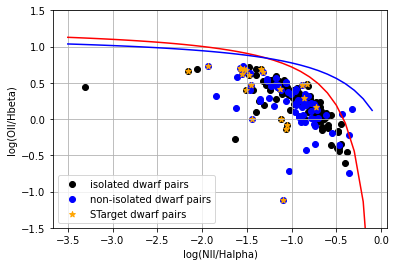

In [518]:
# Plot

plt.scatter(IlogNII[IXInd], IlogOIII[IYInd], color = "black", label = "isolated dwarf pairs")
plt.scatter(NlogNII[NXInd], NlogOIII[NYInd], color = "blue", label = "non-isolated dwarf pairs")
plt.scatter(SlogNII[SXInd], SlogOIII[SYInd], color = "orange", marker = "*", label = "STarget dwarf pairs")


y = (0.61/(xArr - .05)) + 1.3
plt.plot(xArr, y, color = "red")  # empirical separation of SF galaxies and AGN based on SDSS galaxies 

y =(0.61/(xArr-.47)) + 1.19       
plt.plot(xArr, y, color = "blue")  # theoretical limit for star-forming galaxies 

plt.ylim(-1.5, 1.5)

plt.grid()
plt.xlabel("log(NII/Halpha)")
plt.ylabel("log(OII/Hbeta)")
plt.title("")
plt.legend(loc='lower left')

plt.show

In [440]:
# 305 lines

In [523]:
import matplotlib.path as mplPath
import numpy as np

poly = [190, 50, 500, 310]
bbPath = mplPath.Path(np.array([[poly[0], poly[1]],
                     [poly[1], poly[2]],
                     [poly[2], poly[3]],
                     [poly[3], poly[0]]]))
print(bbPath)
bbPath.contains_point((200, 100))

Path(array([[190.,  50.],
       [ 50., 500.],
       [500., 310.],
       [310., 190.]]), None)


True